# Wonsulting User Data Analysis

## Importing libraries and the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df_test = pd.read_csv('product_dataset.csv', sep =',')
df = pd.DataFrame(df_test)

## Calculating the date

In [3]:
df['user_creation_date'] = pd.to_datetime(df['user_creation_date'])
df['Date'] = df['user_creation_date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df['Today\'s date'] = "2022-11-15" #change here
df['Today\'s date'] = pd.to_datetime(df['Today\'s date'])
df['Days1'] = df['Today\'s date'] - df['Date']
df

,id,Number_of_available_tokens,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,user_creation_date,User_Type,Date,Today's date,Days1
0,1,14.0,6.0,NaN,1.0,1.0,Construction,Recent Graduate,NaN,NaN,2021-12-28 10:12:07,Free User,2021-12-28,2022-11-15,322 days
1,2,20.0,NaN,NaN,NaN,NaN,Retail,Recent Graduate,NaN,NaN,2021-12-28 10:12:07,Free User,2021-12-28,2022-11-15,322 days
2,3,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-28 10:12:07,Free User,2021-12-28,2022-11-15,322 days
3,11,967.0,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,2021-12-28 10:12:07,Paid User,2021-12-28,2022-11-15,322 days
4,12,3.0,17.0,1.0,1.0,1.0,Computer Software,Student,NaN,NaN,2021-12-28 10:19:00,Free User,2021-12-28,2022-11-15,322 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36057,37156,20.0,NaN,NaN,1.0,1.0,Graphic Design,Early career,asap,beginner,2022-11-02 15:13:51,Free User,2022-11-02,2022-11-15,13 days
36058,37157,20.0,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,2022-11-02 15:14:33,Free User,2022-11-02,2022-11-15,13 days
36059,37158,20.0,NaN,NaN,1.0,1.0,Computer Software,Student,not-looking,beginner,2022-11-02 15:14:51,Free User,2022-11-02,2022-11-15,13 days
36060,37159,20.0,NaN,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,2022-11-02 15:14:53,Paid User,2022-11-02,2022-11-15,13 days


In [4]:
df['Days2']=df['Days1'].astype(str)

In [5]:
df['Days3'] = df.Days2.str.extract('(\d+)')
df['Days']=df['Days3'].astype(int)

In [6]:
df.drop(['id'], axis = 1, inplace = True)
df.drop(['Number_of_available_tokens'], axis = 1, inplace = True)
df.drop(['user_creation_date'], axis = 1, inplace = True)
df.drop(['Date'], axis = 1, inplace = True)
df.drop(['Today\'s date'], axis = 1, inplace = True)
df.drop(['Days1'], axis = 1, inplace = True)
df.drop(['Days2'], axis = 1, inplace = True)
df.drop(['Days3'], axis = 1, inplace = True)
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
0,6.0,NaN,1.0,1.0,Construction,Recent Graduate,NaN,NaN,Free User,322
1,NaN,NaN,NaN,NaN,Retail,Recent Graduate,NaN,NaN,Free User,322
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Free User,322
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,Paid User,322
4,17.0,1.0,1.0,1.0,Computer Software,Student,NaN,NaN,Free User,322
...,...,...,...,...,...,...,...,...,...,...
36057,NaN,NaN,1.0,1.0,Graphic Design,Early career,asap,beginner,Free User,13
36058,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,Free User,13
36059,NaN,NaN,1.0,1.0,Computer Software,Student,not-looking,beginner,Free User,13
36060,NaN,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,Paid User,13


In [7]:
df.isna().sum()

used_tokens               20559
used_resume_bullet_gen    16400
prompted_payment           3527
used_resume_builder        9201
industry                   1235
career_status               460
job_time                   1638
resume_experience          1729
User_Type                     0
Days                          0
dtype: int64

In [8]:
df['used_tokens'] = df['used_tokens'].fillna(0)
df['used_resume_bullet_gen'] = df['used_resume_bullet_gen'].fillna(0)
df['prompted_payment'] = df['prompted_payment'].fillna(0)
df['used_resume_builder'] = df['used_resume_builder'].fillna(0)
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
0,6.0,0.0,1.0,1.0,Construction,Recent Graduate,NaN,NaN,Free User,322
1,0.0,0.0,0.0,0.0,Retail,Recent Graduate,NaN,NaN,Free User,322
2,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Free User,322
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,Paid User,322
4,17.0,1.0,1.0,1.0,Computer Software,Student,NaN,NaN,Free User,322
...,...,...,...,...,...,...,...,...,...,...
36057,0.0,0.0,1.0,1.0,Graphic Design,Early career,asap,beginner,Free User,13
36058,0.0,0.0,0.0,0.0,NaN,Student,NaN,NaN,Free User,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,not-looking,beginner,Free User,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,Paid User,13


In [9]:
df.isna().sum()

used_tokens                  0
used_resume_bullet_gen       0
prompted_payment             0
used_resume_builder          0
industry                  1235
career_status              460
job_time                  1638
resume_experience         1729
User_Type                    0
Days                         0
dtype: int64

In [10]:
df.dropna(inplace = True) 
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,Paid User,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,asap,beginner,Free User,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,asap,proficient,Free User,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1-3-months,beginner,Free User,182
53,0.0,0.0,0.0,0.0,Retail,Student,asap,beginner,Free User,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,Early career,asap,advanced-beginner,Free User,13
36057,0.0,0.0,1.0,1.0,Graphic Design,Early career,asap,beginner,Free User,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,not-looking,beginner,Free User,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,Paid User,13


In [11]:
df.isna().sum()

used_tokens               0
used_resume_bullet_gen    0
prompted_payment          0
used_resume_builder       0
industry                  0
career_status             0
job_time                  0
resume_experience         0
User_Type                 0
Days                      0
dtype: int64

## Statistics of numerical data

In [12]:
df.describe()

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,Days
count,34120.000000,34120.000000,34120.000000,34120.000000,34120.000000
mean,2.984936,0.565123,0.940328,0.776553,44.694637
std,10.437826,0.495748,0.236881,0.416561,28.571744
min,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.000000,0.000000,1.000000,1.000000,23.000000
50%,0.000000,1.000000,1.000000,1.000000,32.000000
75%,3.000000,1.000000,1.000000,1.000000,59.000000
max,1354.000000,1.000000,1.000000,1.000000,322.000000


In [13]:
df.head()

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,Paid User,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,asap,beginner,Free User,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,asap,proficient,Free User,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1-3-months,beginner,Free User,182
53,0.0,0.0,0.0,0.0,Retail,Student,asap,beginner,Free User,172


## Counting and understanding the frequency of subparameters

In [14]:
df['used_tokens'].value_counts()

0.0       18859
1.0        3869
2.0        2025
3.0        1397
4.0        1065
          ...  
484.0         1
1354.0        1
226.0         1
52.0          1
184.0         1
Name: used_tokens, Length: 86, dtype: int64

In [15]:
df['used_resume_bullet_gen'].value_counts()

1.0    19282
0.0    14838
Name: used_resume_bullet_gen, dtype: int64

<AxesSubplot:xlabel='used_resume_bullet_gen', ylabel='count'>

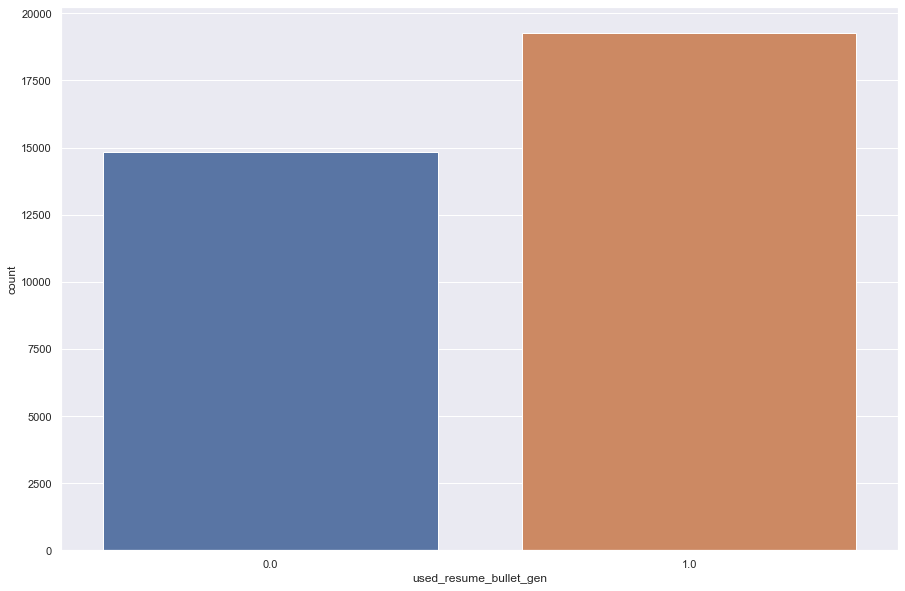

In [16]:
sns.countplot(x=df["used_resume_bullet_gen"])

In [17]:
df['prompted_payment'].value_counts()

1.0    32084
0.0     2036
Name: prompted_payment, dtype: int64

<AxesSubplot:xlabel='prompted_payment', ylabel='count'>

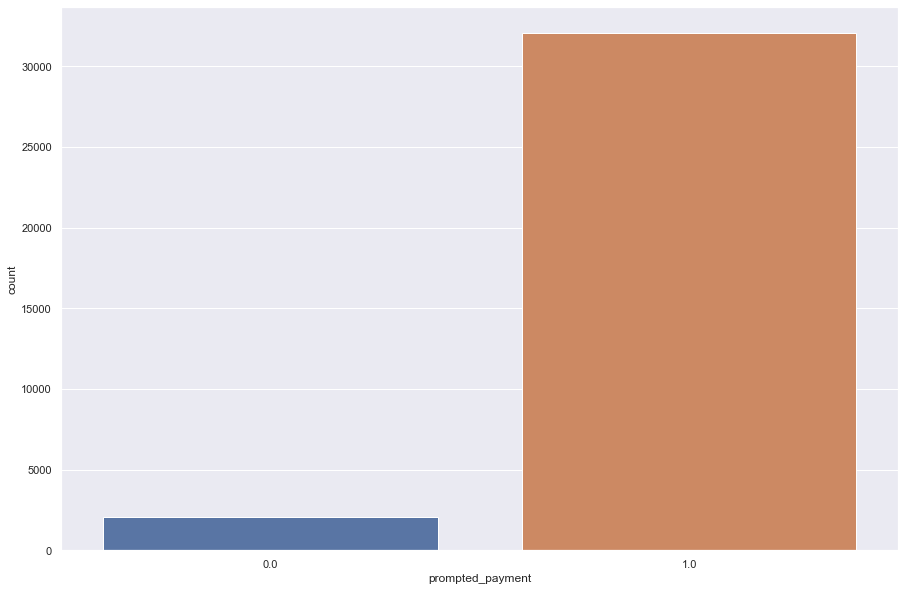

In [18]:
sns.countplot(x=df["prompted_payment"])

In [19]:
df['used_resume_builder'].value_counts() 

1.0    26496
0.0     7624
Name: used_resume_builder, dtype: int64

<AxesSubplot:xlabel='used_resume_builder', ylabel='count'>

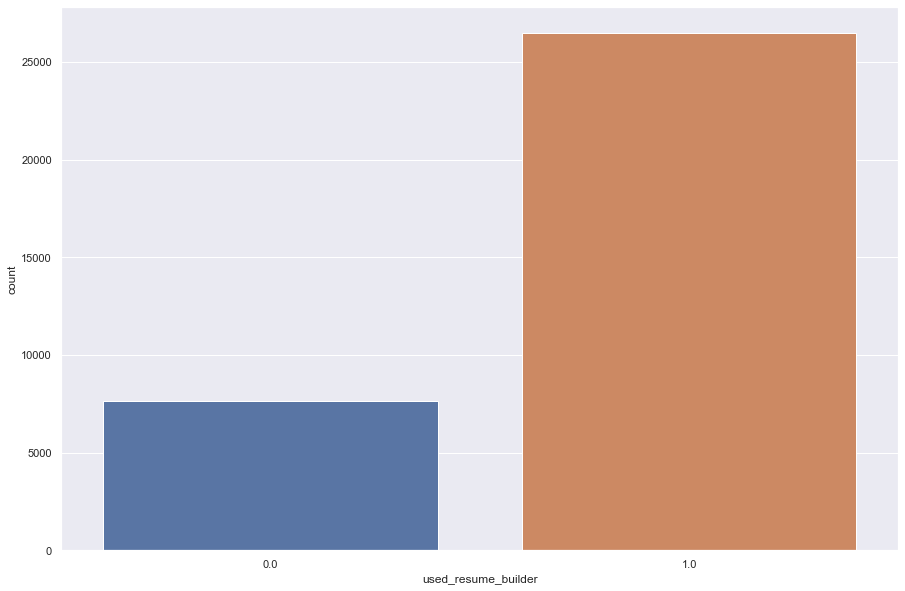

In [20]:
sns.countplot(x=df["used_resume_builder"])

In [21]:
df['industry'].value_counts()

Computer Software                                                                             6803
Marketing and Advertising                                                                     2607
Financial Services                                                                            2174
Management Consulting                                                                         1602
Hospital & Health Care                                                                        1428
                                                                                              ... 
Commercial Cannabis Cultivation                                                                  1
Digital Culture and Transformation                                                               1
any                                                                                              1
Customer Service Management, Non-Profit, Call Center, Data Entry, Executive Administrative       1
UI/UX Desi

### If the frequency is less than 500, categorize them as 'others'

In [22]:
mask = df.groupby('industry').industry.transform('size') < 500
df.industry =  df.industry.mask(mask, 'Other')
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,Paid User,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,asap,beginner,Free User,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,asap,proficient,Free User,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1-3-months,beginner,Free User,182
53,0.0,0.0,0.0,0.0,Retail,Student,asap,beginner,Free User,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,Early career,asap,advanced-beginner,Free User,13
36057,0.0,0.0,1.0,1.0,Other,Early career,asap,beginner,Free User,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,not-looking,beginner,Free User,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,Paid User,13


In [23]:
df['industry'].value_counts()

Other                                   13179
Computer Software                        6803
Marketing and Advertising                2607
Financial Services                       2174
Management Consulting                    1602
Hospital & Health Care                   1428
Human Resources                          1072
Design                                    951
Information Services                      720
Computer & Network Security               684
Mechanical or Industrial Engineering      678
Internet                                  613
Accounting                                552
Retail                                    533
Logistics and Supply Chain                524
Name: industry, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Management Consulting'),
  Text(1, 0, 'Hospital & Health Care'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Information Services'),
  Text(6, 0, 'Computer Software'),
  Text(7, 0, 'Marketing and Advertising'),
  Text(8, 0, 'Computer & Network Security'),
  Text(9, 0, 'Accounting'),
  Text(10, 0, 'Mechanical or Industrial Engineering'),
  Text(11, 0, 'Human Resources'),
  Text(12, 0, 'Design'),
  Text(13, 0, 'Internet'),
  Text(14, 0, 'Logistics and Supply Chain')])

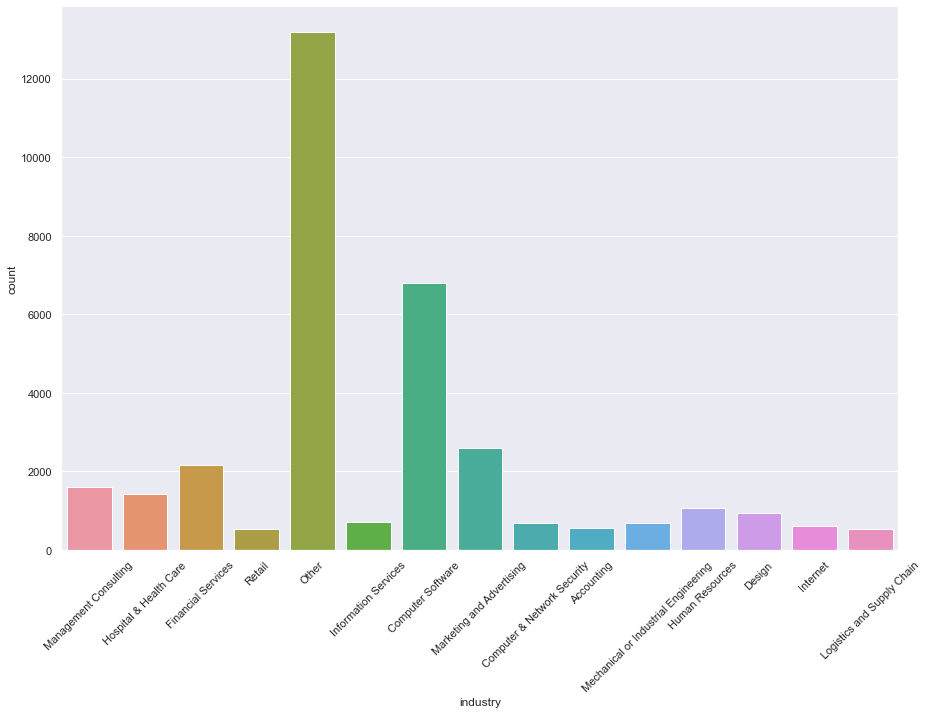

In [24]:
sns.countplot(x=df["industry"])
plt.xticks(rotation=45)

The most number of users are from the following sectors:
1. Other
2. Computer Software
3. Marketing and Advertising
4. Financial services

In [25]:
df['career_status'].value_counts()

Early career    17868
Student          8579
Professional     7673
Name: career_status, dtype: int64

<AxesSubplot:xlabel='career_status', ylabel='count'>

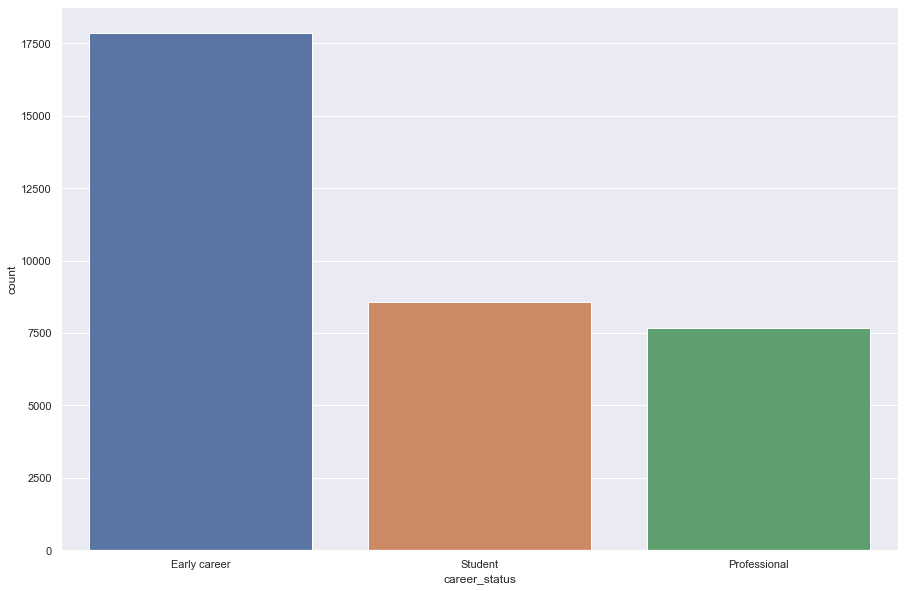

In [26]:
sns.countplot(x=df["career_status"])

The maximum number of users are in their early career and are almost equal to the sum of users who are students and professionals.

In [27]:
df['job_time'].value_counts()

asap           17536
1-3-months      9597
4-months        4509
not-looking     2478
Name: job_time, dtype: int64

<AxesSubplot:xlabel='job_time', ylabel='count'>

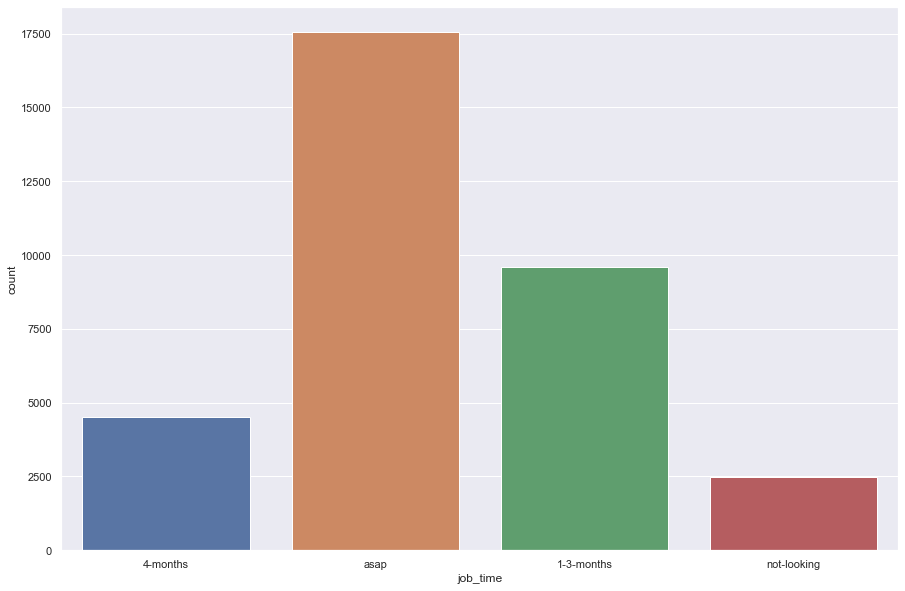

In [28]:
sns.countplot(x=df["job_time"])

Most users are active job seekers.

In [29]:
df['resume_experience'].value_counts()

advanced-beginner    15376
beginner             11490
proficient            6548
expert                 706
Name: resume_experience, dtype: int64

<AxesSubplot:xlabel='resume_experience', ylabel='count'>

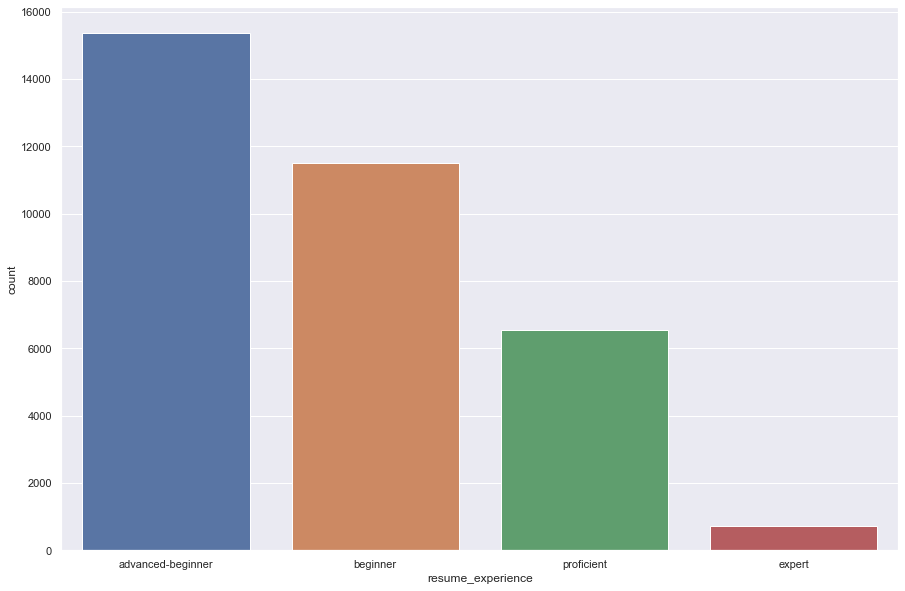

In [30]:
sns.countplot(x=df["resume_experience"])

Most users identify as advanced beginners and beginners for resume experience.

In [31]:
df['User_Type'].value_counts()

Free User    33905
Paid User      215
Name: User_Type, dtype: int64

<AxesSubplot:xlabel='User_Type', ylabel='count'>

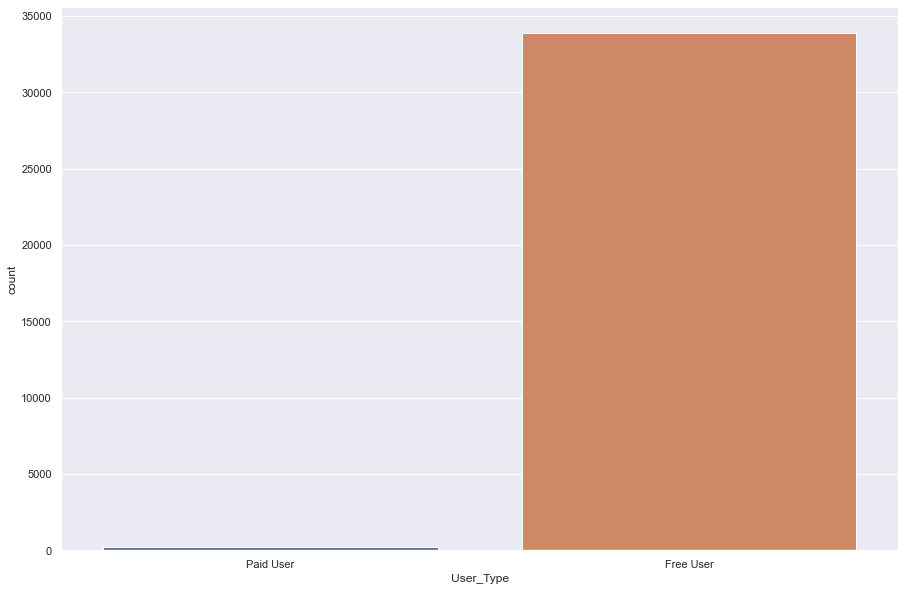

In [32]:
sns.countplot(x=df["User_Type"])

## One hot encoding - converting categorical data to numeric data

In [33]:
df['User_Type'] = df['User_Type'].replace(['Free User', 'Paid User'], [0,1])
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,1,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,asap,beginner,0,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,asap,proficient,0,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1-3-months,beginner,0,182
53,0.0,0.0,0.0,0.0,Retail,Student,asap,beginner,0,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,Early career,asap,advanced-beginner,0,13
36057,0.0,0.0,1.0,1.0,Other,Early career,asap,beginner,0,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,not-looking,beginner,0,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,1,13


## Analysis of each parameter with user type

<AxesSubplot:xlabel='User_Type', ylabel='used_tokens'>

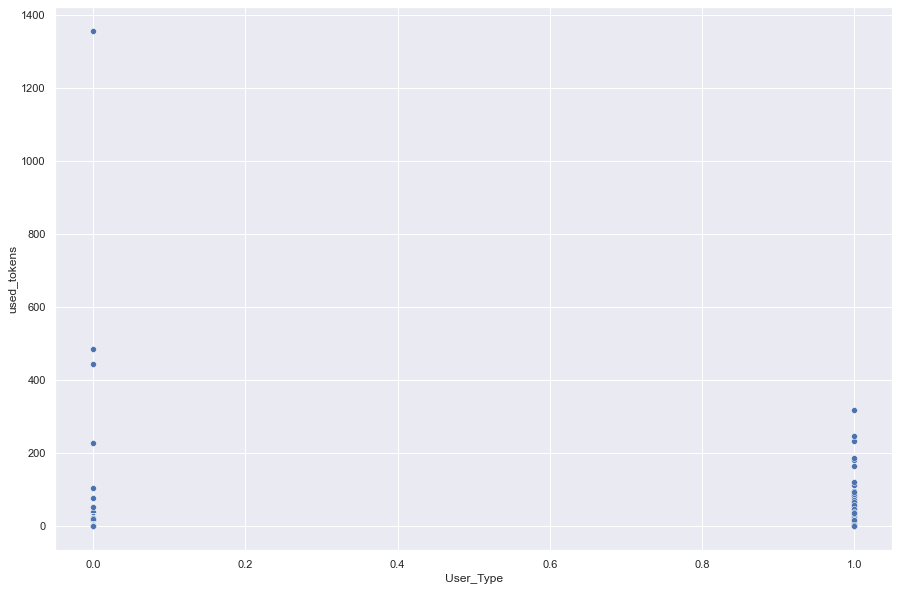

In [34]:
sns.scatterplot(y="used_tokens", x="User_Type", data=df)

Majority of paid users have used tokens between 0 and 150. 

If used tokens crosses 75 and below 200, they are more likely to be paid users.

<AxesSubplot:xlabel='used_resume_bullet_gen', ylabel='User_Type'>

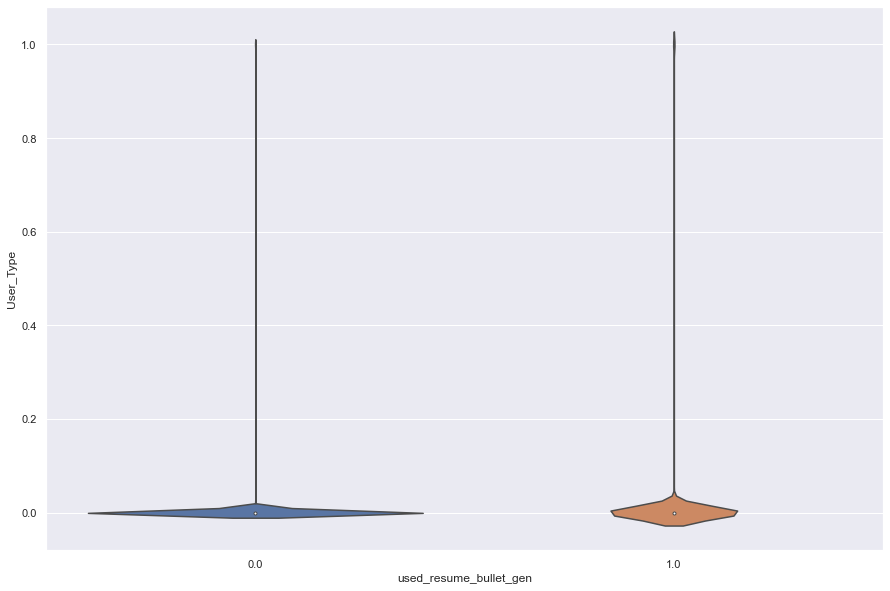

In [35]:
sns.violinplot(y="User_Type", x="used_resume_bullet_gen", data=df)

Most unpaid users do not use the resume bullet generator. If they use the resume bullet generator, more likely they would be paid users.

In [36]:
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,advanced-beginner,1,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,asap,beginner,0,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,asap,proficient,0,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1-3-months,beginner,0,182
53,0.0,0.0,0.0,0.0,Retail,Student,asap,beginner,0,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,Early career,asap,advanced-beginner,0,13
36057,0.0,0.0,1.0,1.0,Other,Early career,asap,beginner,0,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,not-looking,beginner,0,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,asap,proficient,1,13


<AxesSubplot:xlabel='prompted_payment', ylabel='User_Type'>

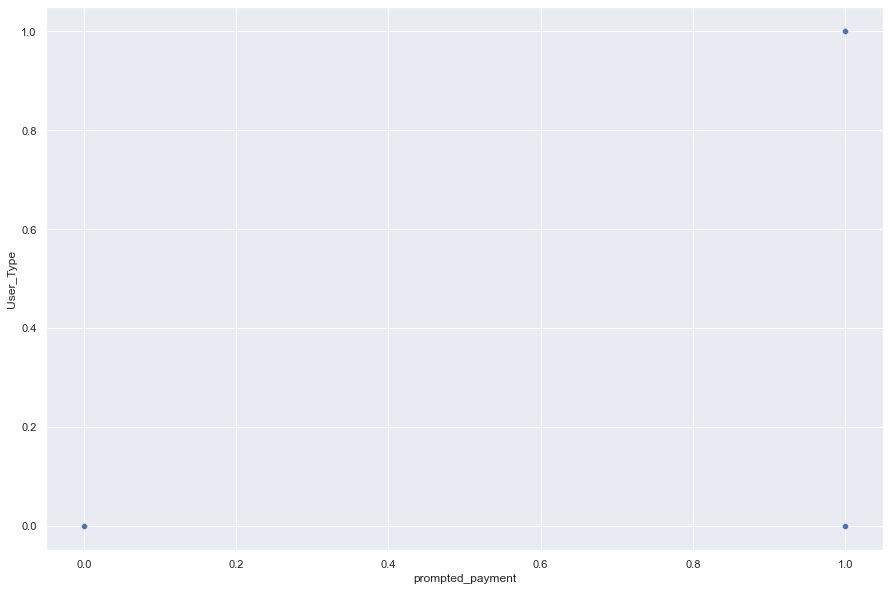

In [37]:
sns.scatterplot(y="User_Type", x="prompted_payment", data=df)

If payment is not prompted, the user does not pay.

<AxesSubplot:xlabel='used_resume_builder', ylabel='User_Type'>

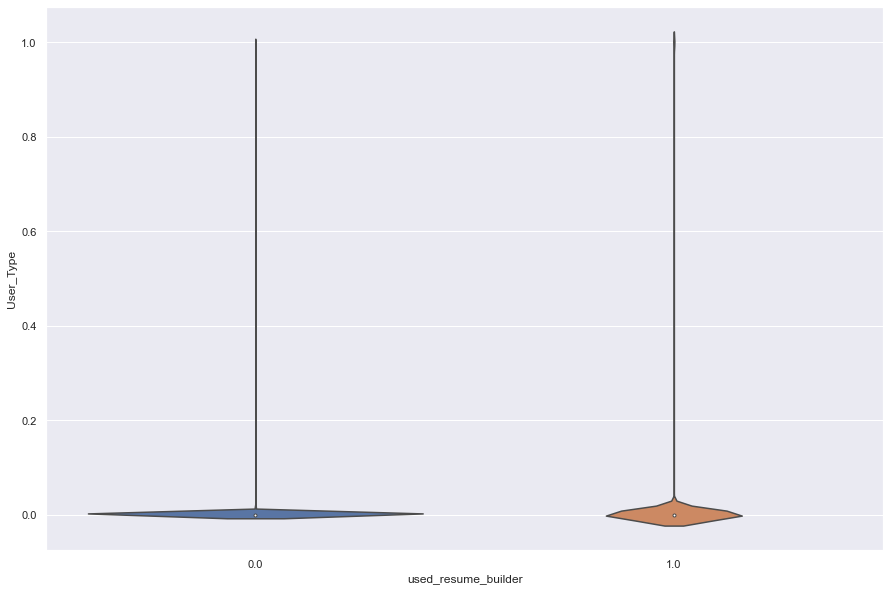

In [38]:
sns.violinplot(y="User_Type", x="used_resume_builder", data=df)

If the user uses the resume builder, they are more likely to pay. Follows a similar trend to used resume bullet generator.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Management Consulting'),
  Text(1, 0, 'Hospital & Health Care'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Information Services'),
  Text(6, 0, 'Computer Software'),
  Text(7, 0, 'Marketing and Advertising'),
  Text(8, 0, 'Computer & Network Security'),
  Text(9, 0, 'Accounting'),
  Text(10, 0, 'Mechanical or Industrial Engineering'),
  Text(11, 0, 'Human Resources'),
  Text(12, 0, 'Design'),
  Text(13, 0, 'Internet'),
  Text(14, 0, 'Logistics and Supply Chain')])

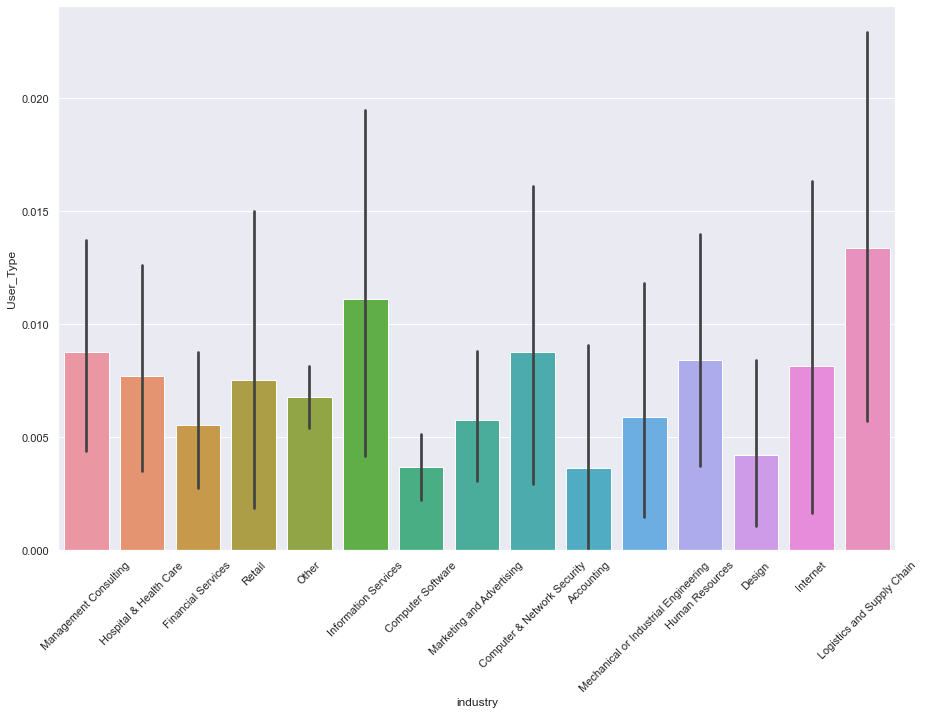

In [39]:
sns.barplot(y="User_Type", x="industry", data=df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='User_Type', ylabel='Days'>

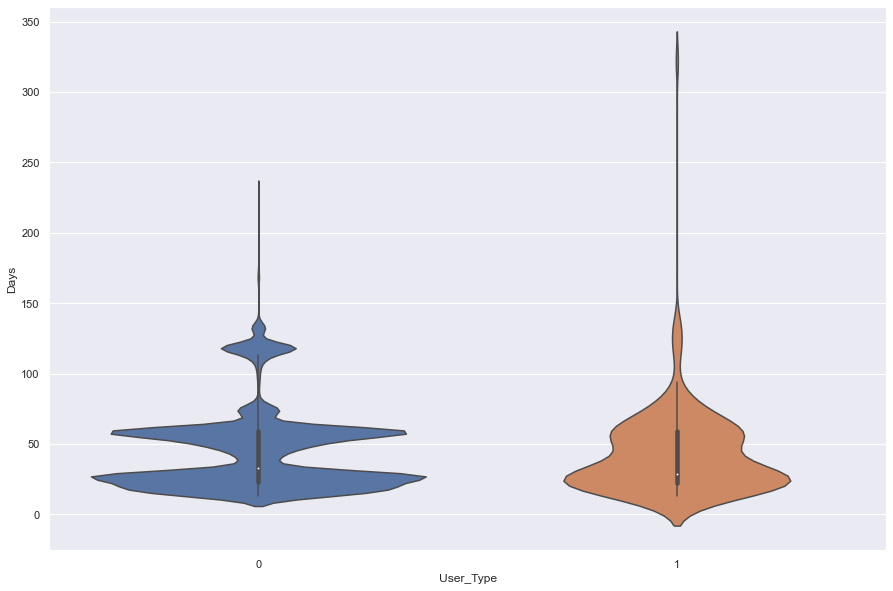

In [40]:
sns.violinplot(y="Days", x="User_Type", data=df)

There is a window where maximum users become paid users and that is between 15 and 30 days of them using the platform.

<AxesSubplot:xlabel='resume_experience', ylabel='User_Type'>

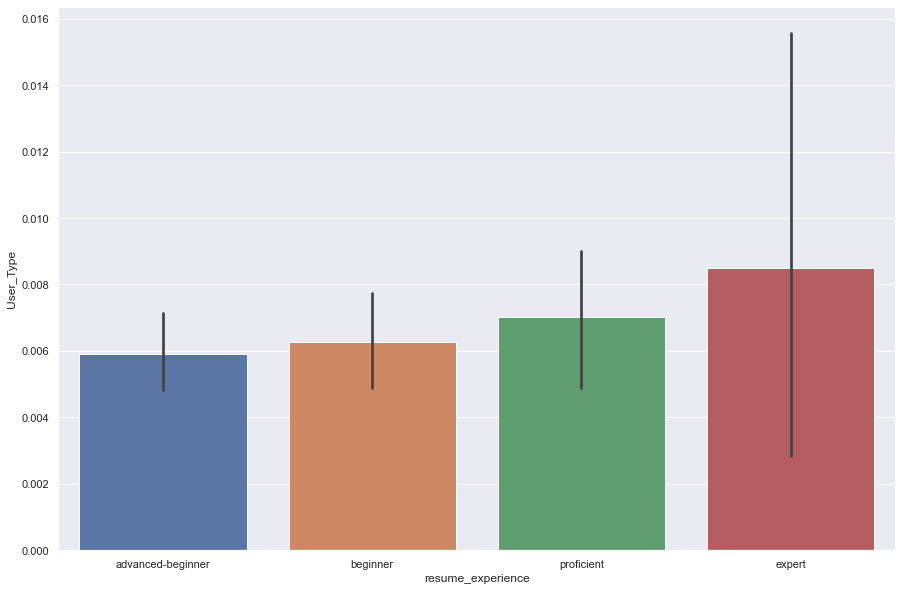

In [41]:
sns.barplot(y="User_Type", x="resume_experience", data=df)

Most users who are likely to pay identify their resume experience as experts, followed by proficient.

<AxesSubplot:xlabel='job_time', ylabel='User_Type'>

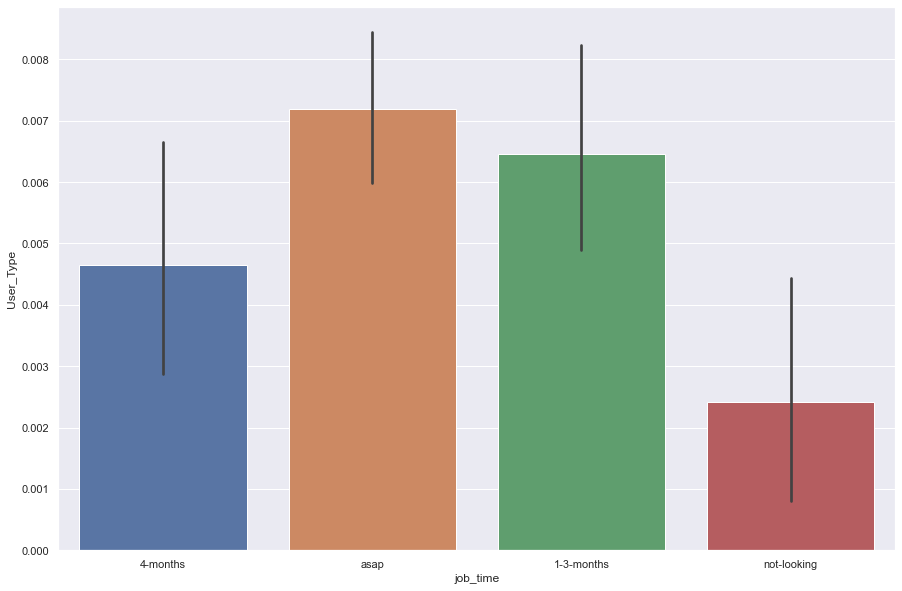

In [42]:
sns.barplot(y="User_Type", x="job_time", data=df)

Most paid users are looking for a job ASAP, followed by users who are looking for a job within 1-3 months. 

<AxesSubplot:xlabel='career_status', ylabel='User_Type'>

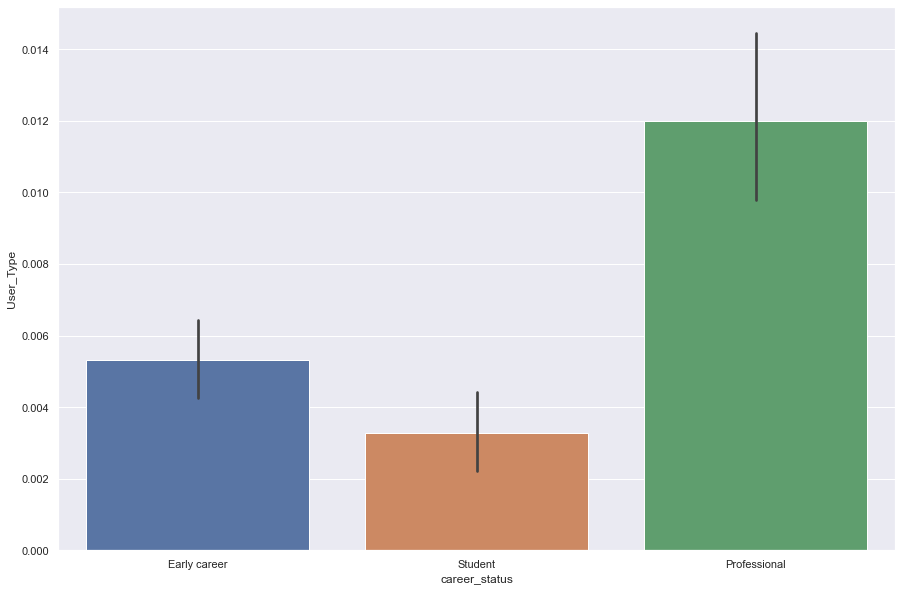

In [43]:
sns.barplot(y="User_Type", x="career_status", data=df)

Most paid users are professionals.

<AxesSubplot:xlabel='used_resume_bullet_gen', ylabel='resume_experience'>

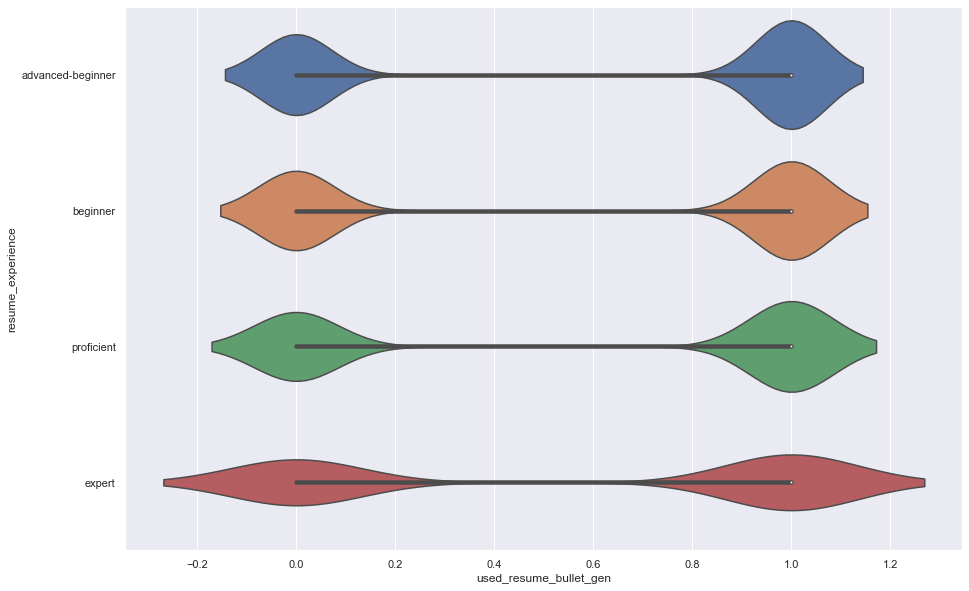

In [44]:
sns.violinplot(y="resume_experience", x="used_resume_bullet_gen", data=df)

<AxesSubplot:xlabel='prompted_payment', ylabel='resume_experience'>

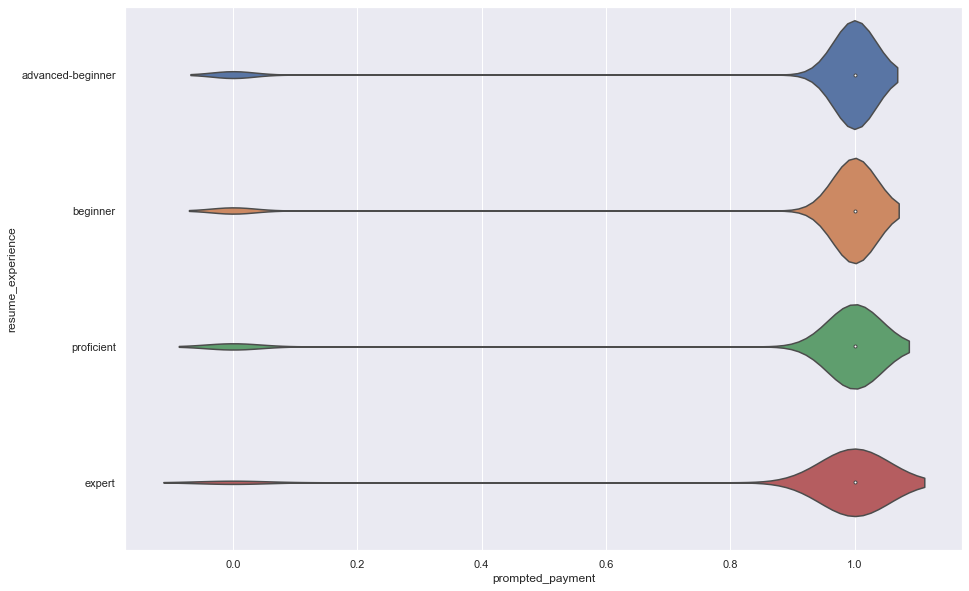

In [45]:
sns.violinplot(y="resume_experience", x="prompted_payment", data=df)

<AxesSubplot:xlabel='used_resume_builder', ylabel='resume_experience'>

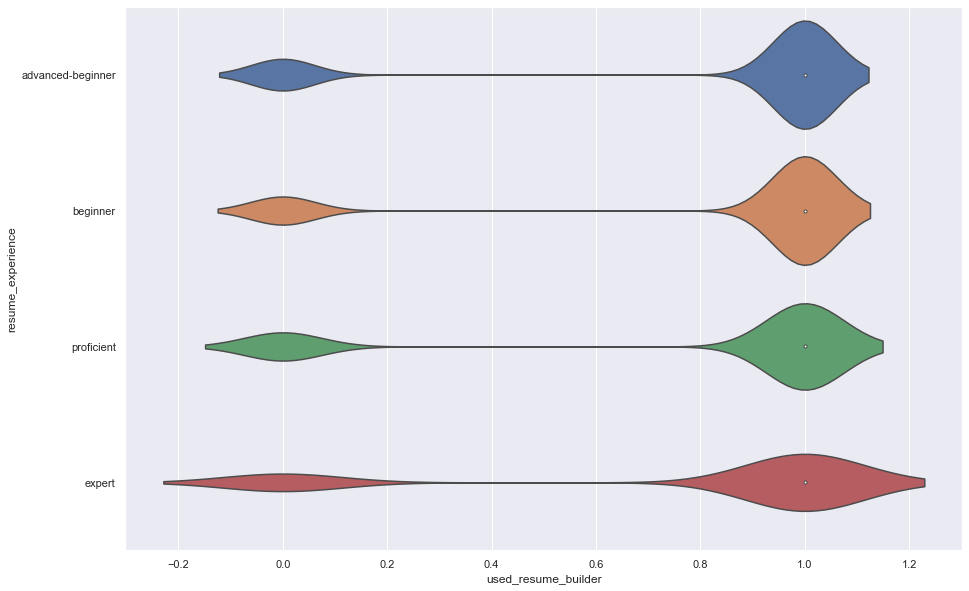

In [46]:
sns.violinplot(y="resume_experience", x="used_resume_builder", data=df)

In [47]:
df['resume_experience'] = df['resume_experience'].replace(['advanced-beginner', 'beginner', 'proficient', 'expert'], [0,1,2,3])
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,4-months,0,1,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,asap,1,0,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,asap,2,0,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1-3-months,1,0,182
53,0.0,0.0,0.0,0.0,Retail,Student,asap,1,0,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,Early career,asap,0,0,13
36057,0.0,0.0,1.0,1.0,Other,Early career,asap,1,0,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,not-looking,1,0,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,asap,2,1,13


<AxesSubplot:xlabel='resume_experience', ylabel='used_tokens'>

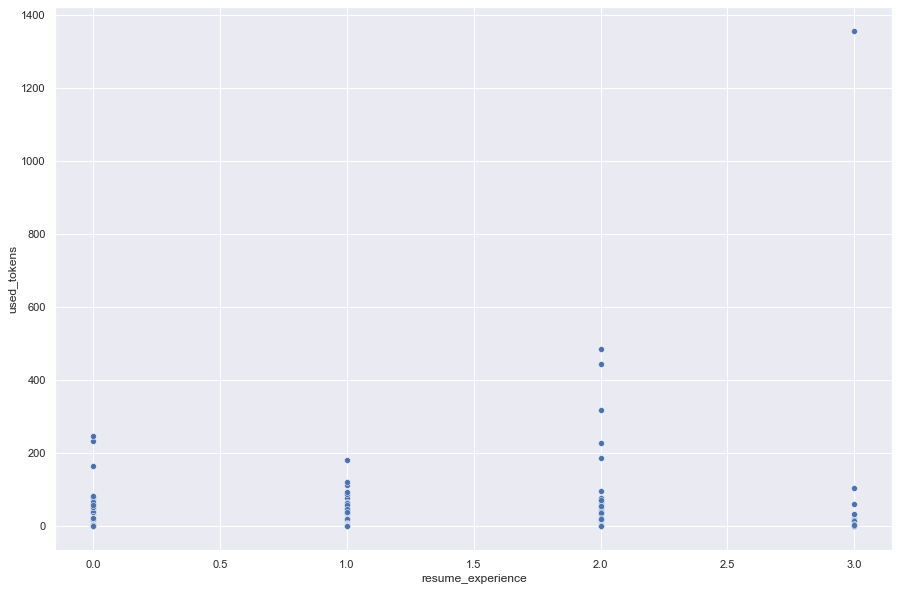

In [48]:
sns.scatterplot(data=df, x="resume_experience", y="used_tokens")

Proficient users are more likely to use more tokens, followed by advanced beginners.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Management Consulting'),
  Text(1, 0, 'Hospital & Health Care'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Information Services'),
  Text(6, 0, 'Computer Software'),
  Text(7, 0, 'Marketing and Advertising'),
  Text(8, 0, 'Computer & Network Security'),
  Text(9, 0, 'Accounting'),
  Text(10, 0, 'Mechanical or Industrial Engineering'),
  Text(11, 0, 'Human Resources'),
  Text(12, 0, 'Design'),
  Text(13, 0, 'Internet'),
  Text(14, 0, 'Logistics and Supply Chain')])

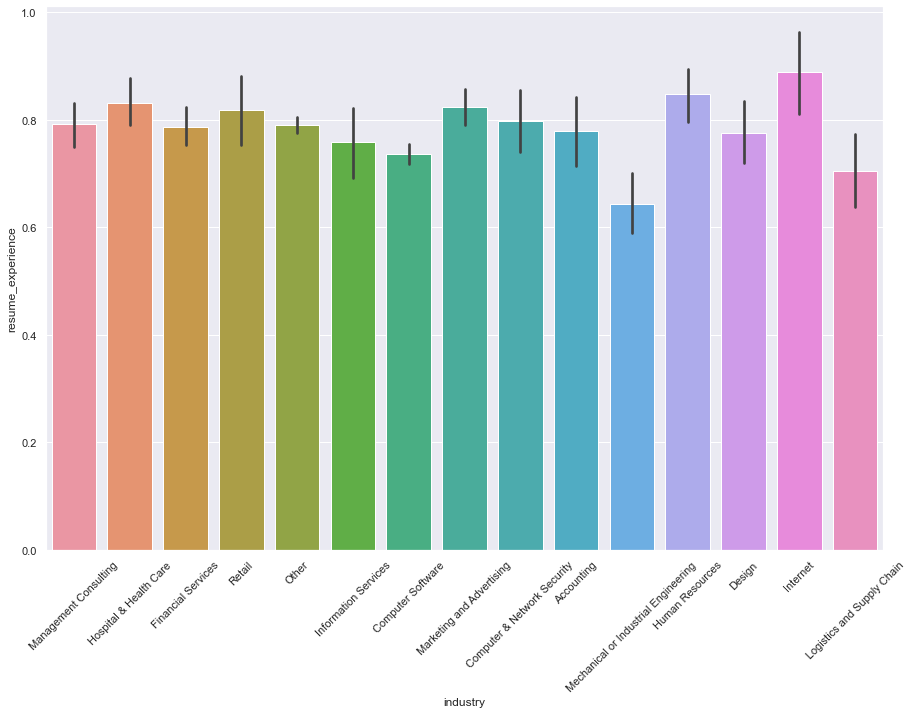

In [49]:
sns.barplot(y="resume_experience", x="industry", data=df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='job_time', ylabel='resume_experience'>

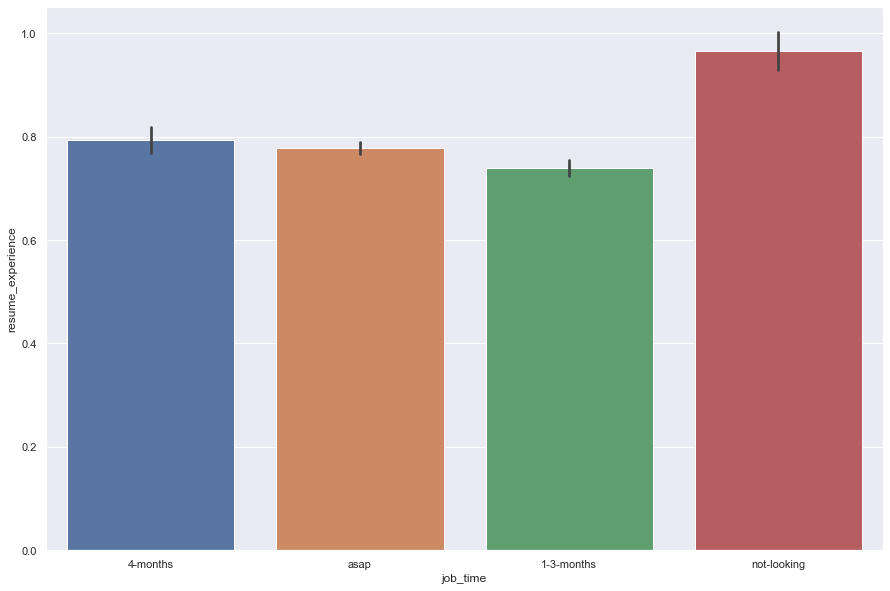

In [50]:
sns.barplot(y="resume_experience", x="job_time", data=df)

The category of users who are not looking for a job have maximum resume experience.

<AxesSubplot:xlabel='career_status', ylabel='resume_experience'>

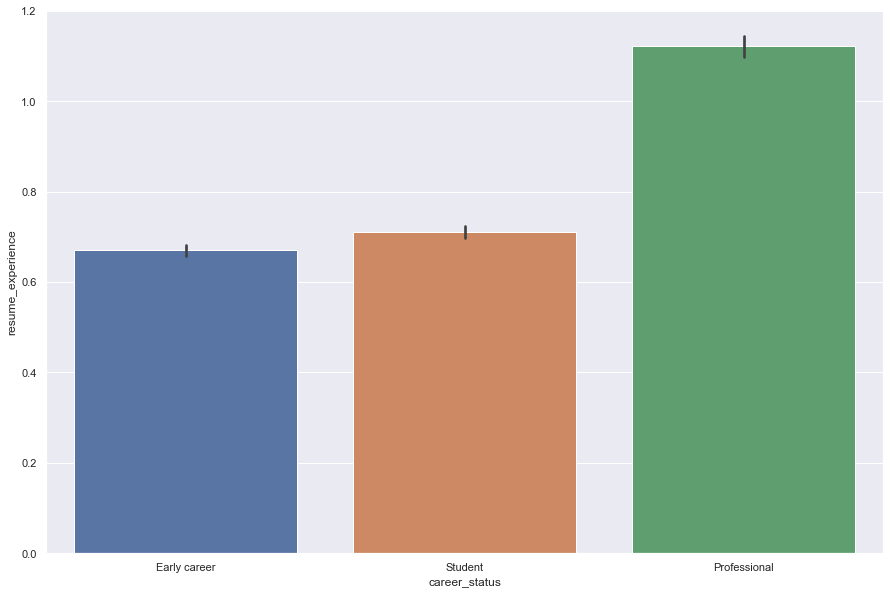

In [51]:
sns.barplot(y="resume_experience", x="career_status", data=df)

Professionals are have maximum resume experience.

<AxesSubplot:xlabel='resume_experience', ylabel='Days'>

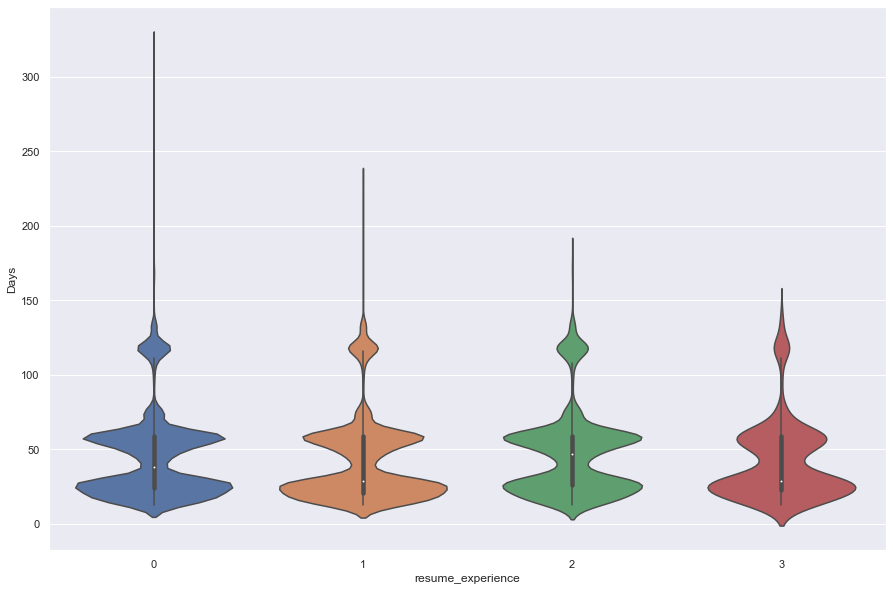

In [52]:
sns.violinplot(y="Days", x="resume_experience", data=df)

Maximum number of users who are beginners have used the platform between 15 to 30 days. 
Maximum number of users who are advanced beginners/experts have used the platform between 55 to 65 days. 

In [53]:
df['job_time'] = df['job_time'].replace(['asap', '1-3-months', '4-months', 'not-looking'], [0,1,2,3])
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,Early career,2,0,1,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,Student,0,1,0,230
17,1.0,1.0,1.0,0.0,Management Consulting,Professional,0,2,0,182
18,1.0,1.0,1.0,1.0,Financial Services,Early career,1,1,0,182
53,0.0,0.0,0.0,0.0,Retail,Student,0,1,0,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,Early career,0,0,0,13
36057,0.0,0.0,1.0,1.0,Other,Early career,0,1,0,13
36059,0.0,0.0,1.0,1.0,Computer Software,Student,3,1,0,13
36060,0.0,1.0,1.0,1.0,Computer Software,Early career,0,2,1,13


<AxesSubplot:xlabel='job_time', ylabel='used_tokens'>

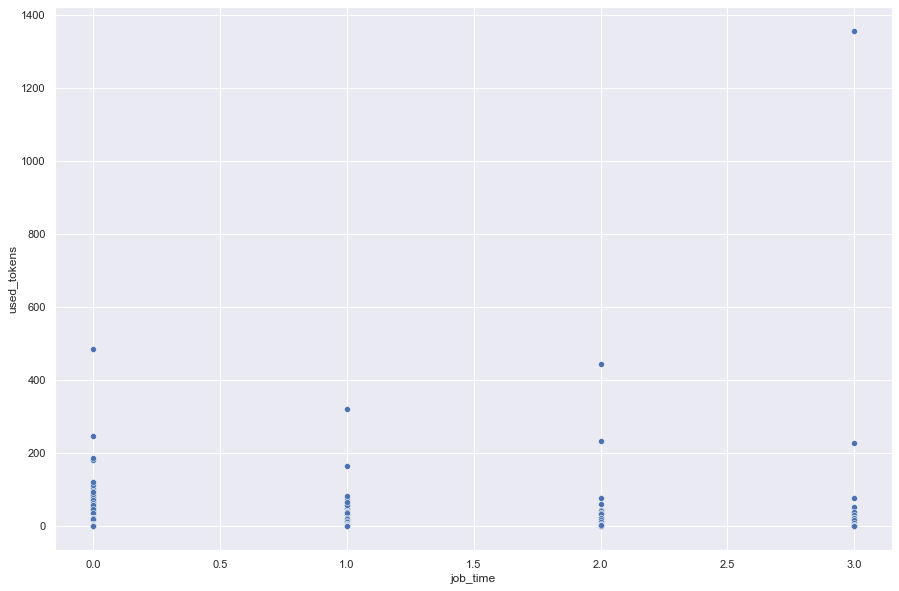

In [54]:
sns.scatterplot(y="used_tokens", x="job_time", data=df)

The most number of users who are looking for a job ASAP use maximum tokens, followed by users who are looking for jobs in 4 months

<AxesSubplot:xlabel='used_resume_bullet_gen', ylabel='job_time'>

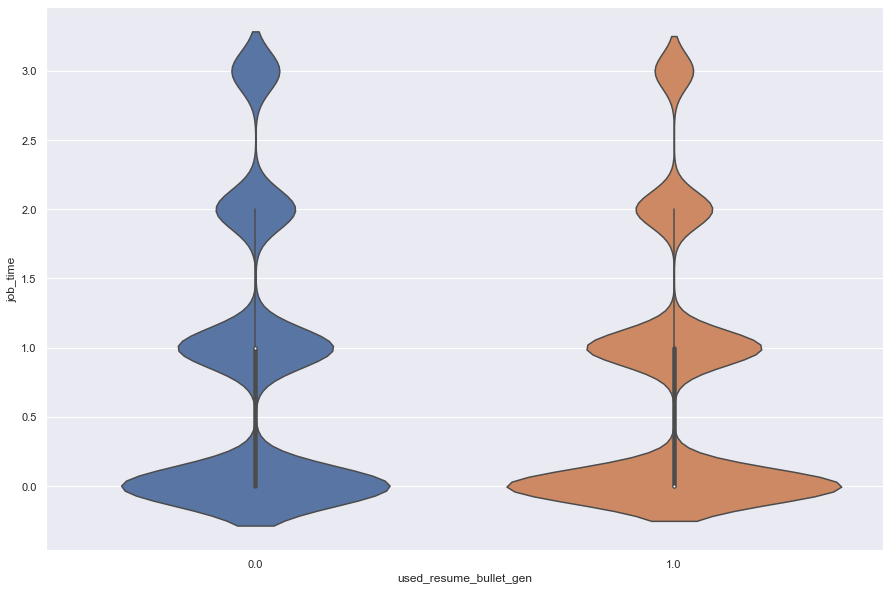

In [55]:
sns.violinplot(y="job_time", x="used_resume_bullet_gen", data=df)

<AxesSubplot:xlabel='prompted_payment', ylabel='job_time'>

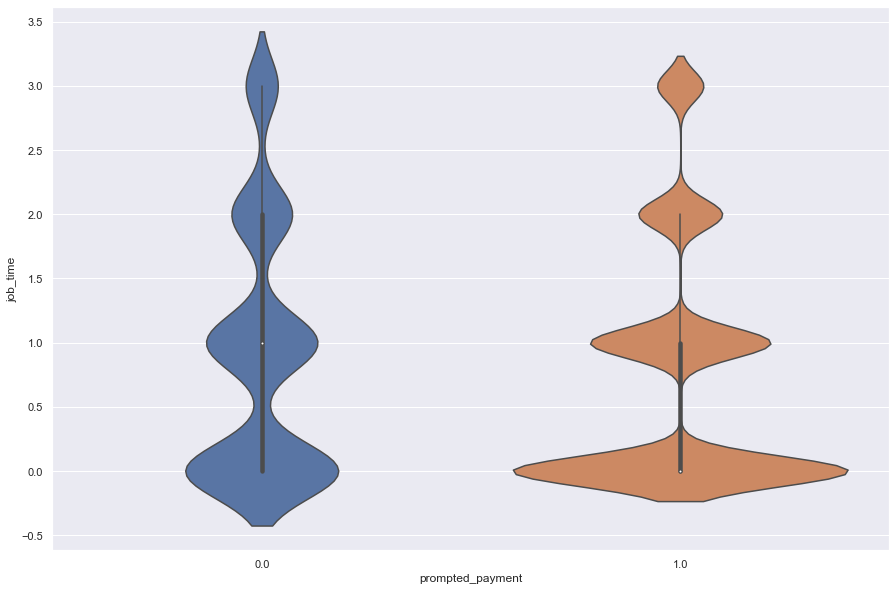

In [56]:
sns.violinplot(y="job_time", x="prompted_payment", data=df)

<AxesSubplot:xlabel='used_resume_builder', ylabel='job_time'>

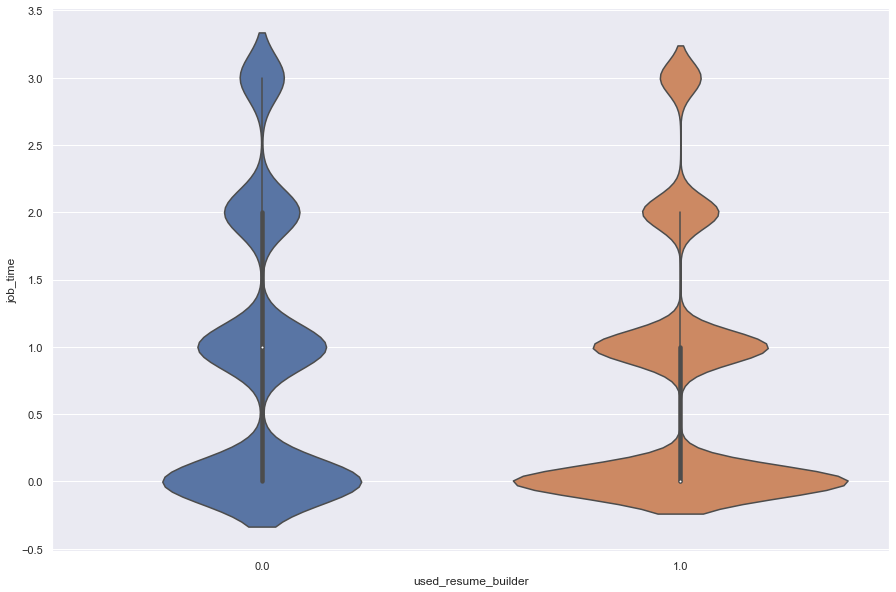

In [57]:
sns.violinplot(y="job_time", x="used_resume_builder", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Management Consulting'),
  Text(1, 0, 'Hospital & Health Care'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Information Services'),
  Text(6, 0, 'Computer Software'),
  Text(7, 0, 'Marketing and Advertising'),
  Text(8, 0, 'Computer & Network Security'),
  Text(9, 0, 'Accounting'),
  Text(10, 0, 'Mechanical or Industrial Engineering'),
  Text(11, 0, 'Human Resources'),
  Text(12, 0, 'Design'),
  Text(13, 0, 'Internet'),
  Text(14, 0, 'Logistics and Supply Chain')])

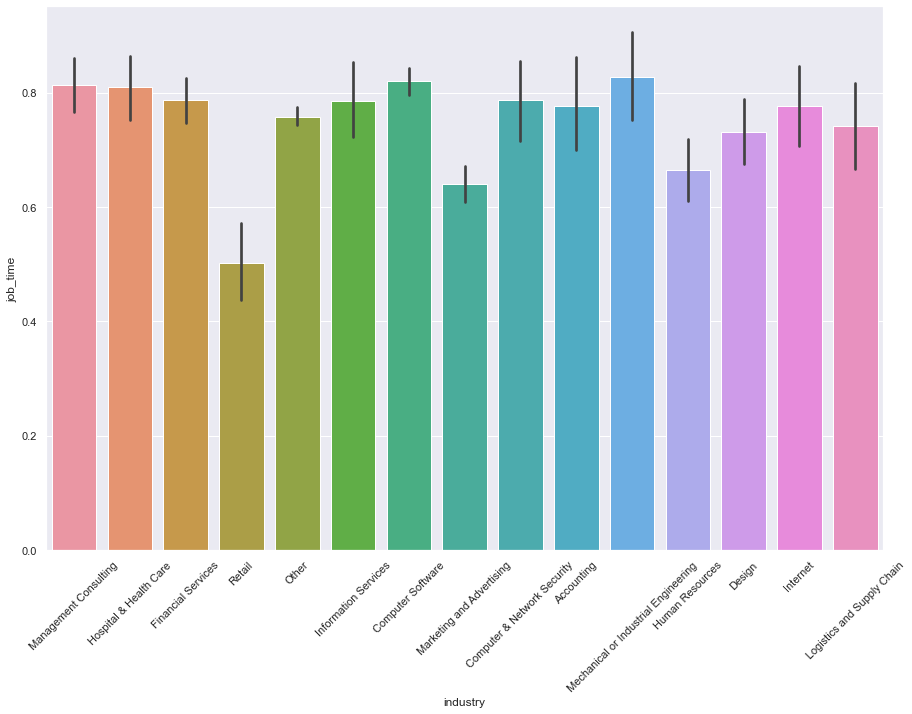

In [58]:
sns.barplot(y="job_time", x="industry", data=df)
plt.xticks(rotation=45)

In [59]:
df['career_status'] = df['career_status'].replace(['Early career', 'Professional', 'Student'], [0,1,2])
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,Management Consulting,0,2,0,1,322
12,4.0,1.0,1.0,1.0,Hospital & Health Care,2,0,1,0,230
17,1.0,1.0,1.0,0.0,Management Consulting,1,0,2,0,182
18,1.0,1.0,1.0,1.0,Financial Services,0,1,1,0,182
53,0.0,0.0,0.0,0.0,Retail,2,0,1,0,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,Marketing and Advertising,0,0,0,0,13
36057,0.0,0.0,1.0,1.0,Other,0,0,1,0,13
36059,0.0,0.0,1.0,1.0,Computer Software,2,3,1,0,13
36060,0.0,1.0,1.0,1.0,Computer Software,0,0,2,1,13


In [60]:
df['industry'] = df['industry'].replace(['Other', 'Computer Software', 'Marketing and Advertising', 'Financial Services', 'Management Consulting', 'Hospital & Health Care', 'Retail', 'Human Resources', 'Design', 'Information Services', 'Information Services', 'Computer & Network Security', 'Mechanical or Industrial Engineering', 'Internet', 'Accounting', 'Logistics and Supply Chain', 'Management Consulting'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
df

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
3,233.0,1.0,1.0,1.0,4,0,2,0,1,322
12,4.0,1.0,1.0,1.0,5,2,0,1,0,230
17,1.0,1.0,1.0,0.0,4,1,0,2,0,182
18,1.0,1.0,1.0,1.0,3,0,1,1,0,182
53,0.0,0.0,0.0,0.0,6,2,0,1,0,172
...,...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,2,0,0,0,0,13
36057,0.0,0.0,1.0,1.0,0,0,0,1,0,13
36059,0.0,0.0,1.0,1.0,1,2,3,1,0,13
36060,0.0,1.0,1.0,1.0,1,0,0,2,1,13


## Consolidated Analysis

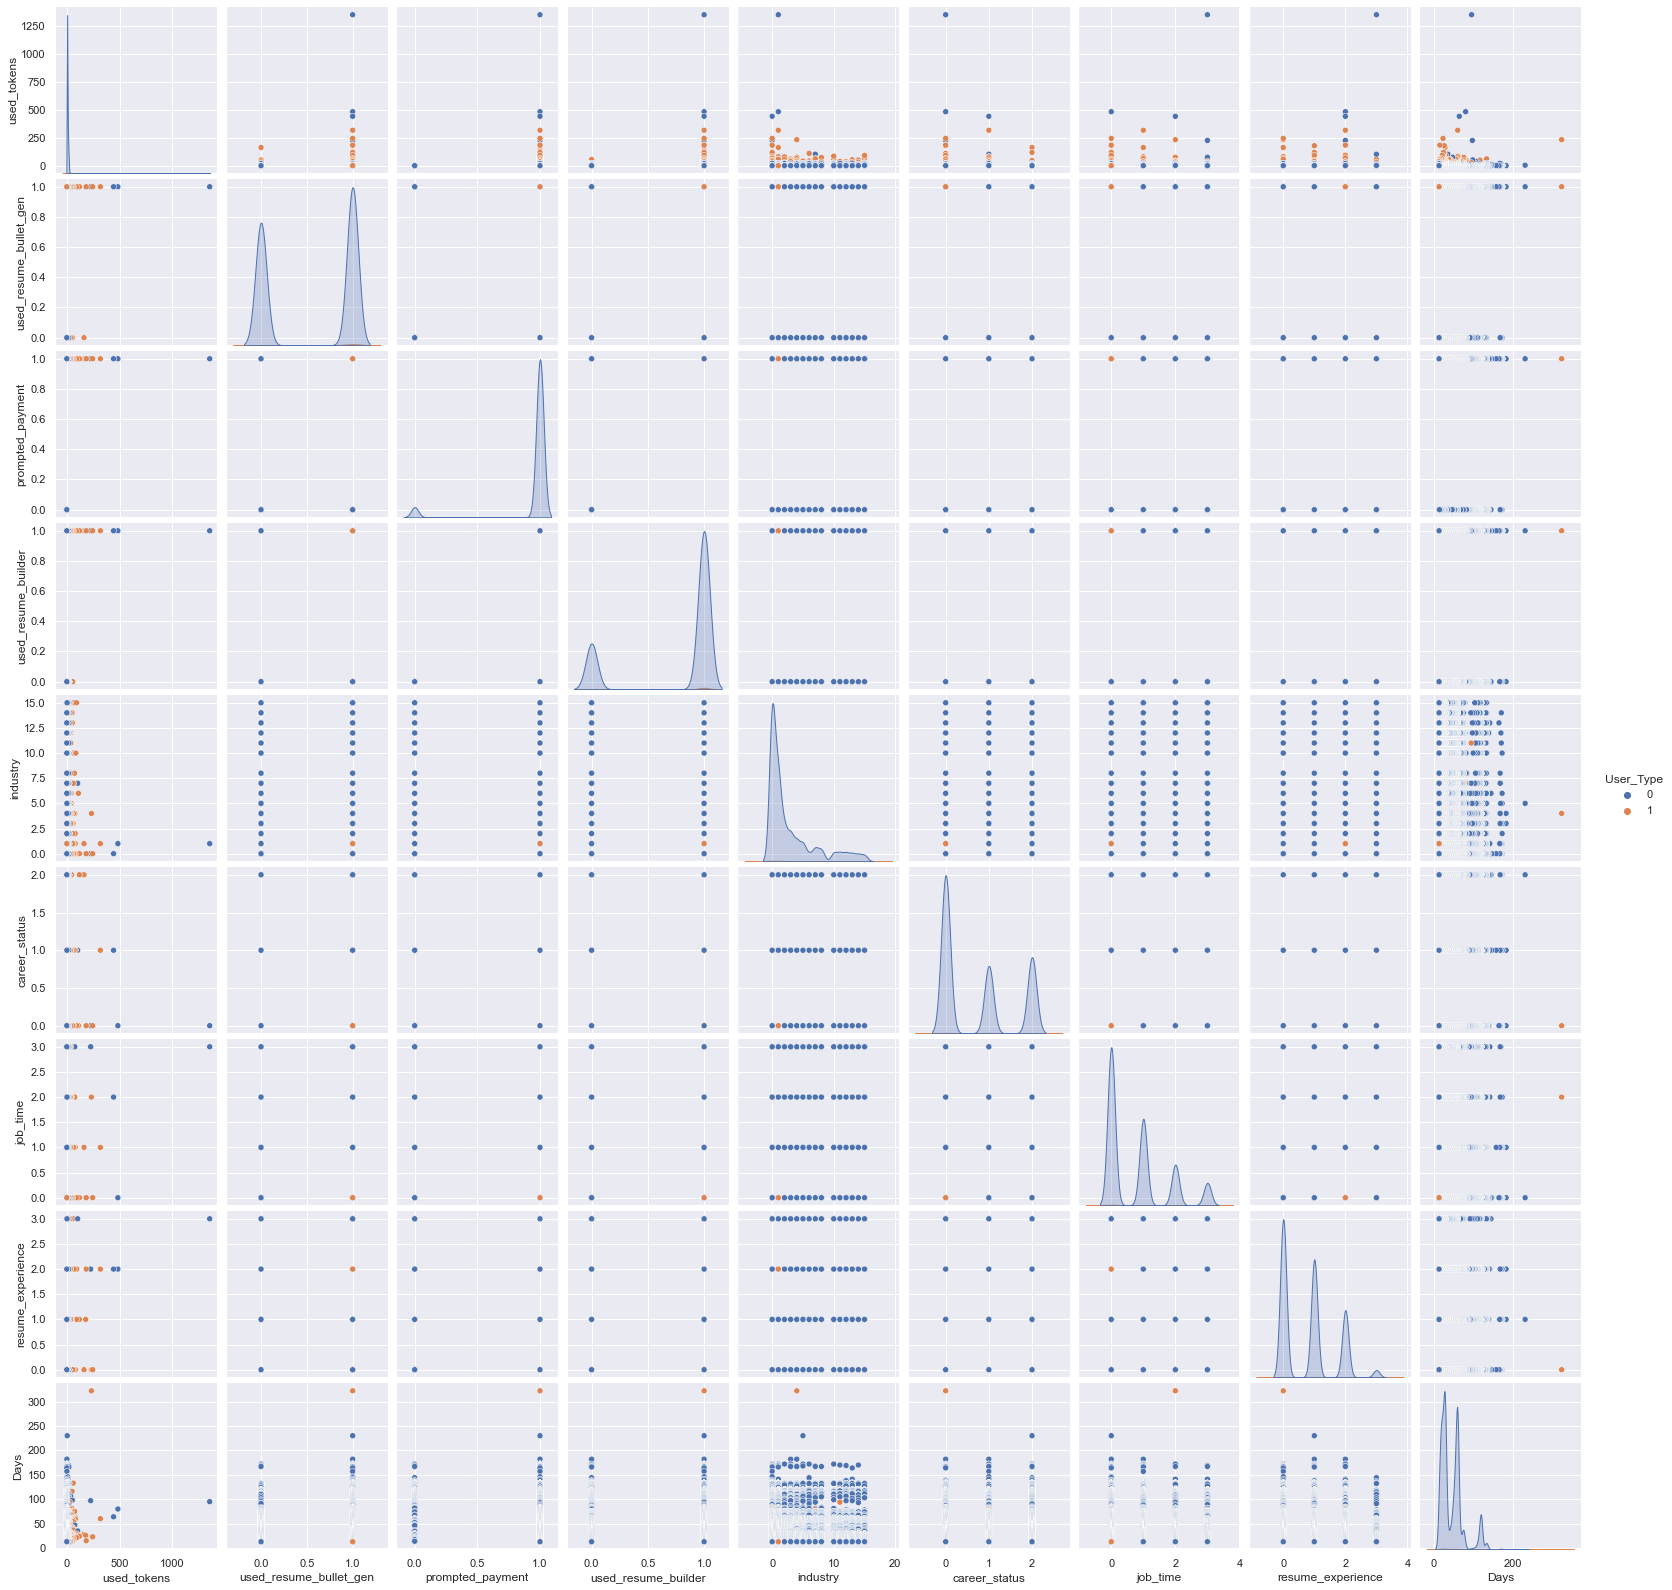

In [61]:
sns.pairplot(data=df, hue="User_Type")

<AxesSubplot:>

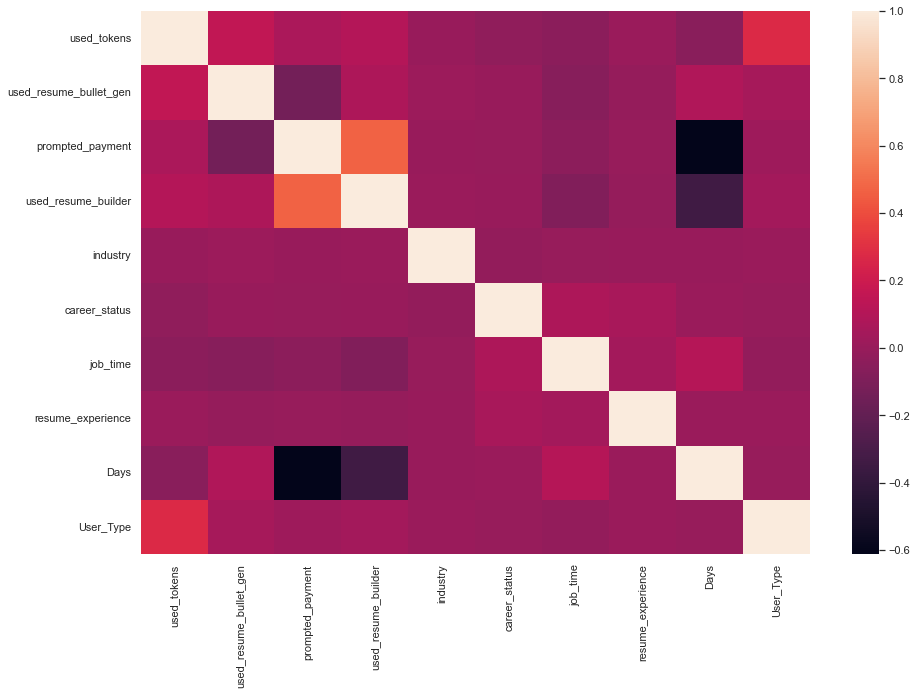

In [62]:
sns.heatmap(df[["used_tokens","used_resume_bullet_gen","prompted_payment","used_resume_builder", "industry", "career_status", "job_time", "resume_experience", "Days", "User_Type"]].corr())

*Reading a heatmap*
- The closer the value is to 1 (or -1), the stronger a relationship.The closer a number is to 0, the weaker the relationship.
- If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases.
- If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.
- If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.

In [63]:
df.corr()

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,User_Type,Days
used_tokens,1.000000,0.151756,0.072040,0.102691,-0.000299,-0.027484,-0.049067,0.007158,0.269517,-0.053012
used_resume_bullet_gen,0.151756,1.000000,-0.135126,0.079124,0.014071,0.001231,-0.063874,-0.009193,0.054166,0.090673
prompted_payment,0.072040,-0.135126,1.000000,0.469616,0.003055,-0.007875,-0.042403,-0.007141,0.020060,-0.613455
used_resume_builder,0.102691,0.079124,0.469616,1.000000,0.004762,0.002471,-0.090303,-0.010260,0.039159,-0.341472
industry,-0.000299,0.014071,0.003055,0.004762,1.000000,-0.020414,-0.002933,-0.000972,0.009602,0.003036
career_status,-0.027484,0.001231,-0.007875,0.002471,-0.020414,1.000000,0.078733,0.059260,-0.003746,0.006229
job_time,-0.049067,-0.063874,-0.042403,-0.090303,-0.002933,0.078733,1.000000,0.039018,-0.016633,0.107508
resume_experience,0.007158,-0.009193,-0.007141,-0.010260,-0.000972,0.059260,0.039018,1.000000,0.006176,0.004762
User_Type,0.269517,0.054166,0.020060,0.039159,0.009602,-0.003746,-0.016633,0.006176,1.000000,-0.006253
Days,-0.053012,0.090673,-0.613455,-0.341472,0.003036,0.006229,0.107508,0.004762,-0.006253,1.000000


*Positive correlation*
- Prompted Payment and Used Resume Builder
- User Type and Used Tokens

*Negative correlation*
- Prompted Payment and Days (strong!)
- Days and Used Resume Builder

## Machine Learning Model

Creating a subsect of the dataset to be used to train the model

In [64]:
X = df.drop(['User_Type'], axis = 1)
X  

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,Days
3,233.0,1.0,1.0,1.0,4,0,2,0,322
12,4.0,1.0,1.0,1.0,5,2,0,1,230
17,1.0,1.0,1.0,0.0,4,1,0,2,182
18,1.0,1.0,1.0,1.0,3,0,1,1,182
53,0.0,0.0,0.0,0.0,6,2,0,1,172
...,...,...,...,...,...,...,...,...,...
36056,0.0,0.0,1.0,1.0,2,0,0,0,13
36057,0.0,0.0,1.0,1.0,0,0,0,1,13
36059,0.0,0.0,1.0,1.0,1,2,3,1,13
36060,0.0,1.0,1.0,1.0,1,0,0,2,13


In [65]:
Y = df['User_Type']
Y

3        1
12       0
17       0
18       0
53       0
        ..
36056    0
36057    0
36059    0
36060    1
36061    0
Name: User_Type, Length: 34120, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, shuffle=True) 

In [68]:
# X_train.to_pickle("xtrain", compression="xz") 

In [69]:
X_train

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,Days
34843,0.0,0.0,1.0,1.0,2,2,0,1,14
27719,0.0,1.0,1.0,1.0,7,0,1,2,22
9526,0.0,0.0,1.0,1.0,7,2,1,1,59
34104,1.0,0.0,1.0,1.0,0,0,2,0,15
1747,1.0,1.0,1.0,1.0,1,0,0,1,119
...,...,...,...,...,...,...,...,...,...
3161,0.0,1.0,0.0,0.0,0,2,0,1,111
17748,0.0,0.0,1.0,0.0,1,2,3,1,39
12126,21.0,1.0,1.0,1.0,10,1,0,1,57
26045,0.0,1.0,1.0,1.0,10,2,0,1,25


In [70]:
# y_train.to_pickle("ytrain", compression="xz")

In [71]:
y_train

34843    0
27719    0
9526     0
34104    0
1747     0
        ..
3161     0
17748    0
12126    0
26045    0
30723    0
Name: User_Type, Length: 25590, dtype: int64

In [72]:
# X_test.to_pickle("xtest", compression = "xz")

In [73]:
X_test

,used_tokens,used_resume_bullet_gen,prompted_payment,used_resume_builder,industry,career_status,job_time,resume_experience,Days
12023,3.0,0.0,1.0,1.0,5,2,1,1,57
25961,1.0,1.0,1.0,1.0,0,0,0,1,25
22994,0.0,0.0,1.0,1.0,2,0,0,0,28
2359,0.0,1.0,0.0,0.0,1,0,0,0,118
30394,0.0,0.0,1.0,1.0,8,0,1,1,19
...,...,...,...,...,...,...,...,...,...
19256,1.0,1.0,1.0,1.0,0,0,0,1,29
11219,0.0,0.0,1.0,1.0,0,0,1,0,58
4274,7.0,1.0,1.0,1.0,0,2,2,1,74
28723,1.0,0.0,1.0,1.0,5,1,1,0,21


In [74]:
# y_test.to_pickle("ytest", compression = "xz")

In [75]:
y_test

12023    0
25961    0
22994    0
2359     0
30394    0
        ..
19256    0
11219    0
4274     0
28723    0
7138     0
Name: User_Type, Length: 8530, dtype: int64

In [76]:
X_test.shape

(8530, 9)

In [77]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

Feature 0: 3620.580580
Feature 1: 75.818574
Feature 2: 9.185904
Feature 3: 39.538789
Feature 4: 0.719367
Feature 5: 0.486292
Feature 6: 9.159740
Feature 7: 0.279760
Feature 8: 0.066384


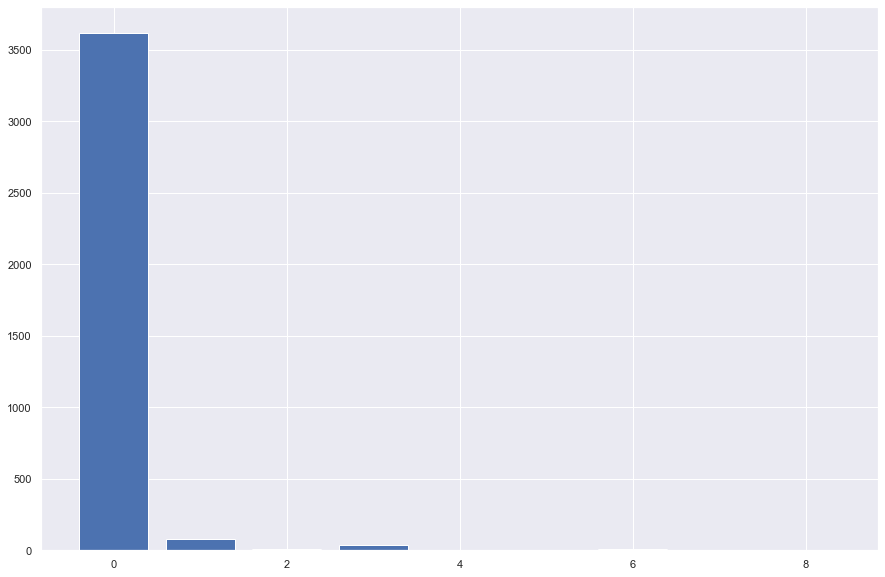

In [78]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Most important features

- Used tokens (has a significantly higher correlation to a user being a paid)
- Used resume bullet generator
- Used resume builder 
- Prompted Payment
- Career status

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
lr = GaussianNB()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5907385697538101

This means that the model has predicted that it is ~60% about its prediction if a user will be a paid user or not.

In [81]:
model = GaussianNB().fit(X, Y) 
r_sq = model.score(X, Y)
y_pred = model.predict(X)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[1 1 0 ... 0 1 0]


In [82]:
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [83]:
X_train.to_csv('xtrain.csv')

In [84]:
y_pred = pd.DataFrame(y_pred, columns=['y_pred']).to_csv('Prediction_GNB.csv')

The prediction outcomes are in Prediction_GNB.csv and the values to the corresponding users are in xtrain.csv